In [1]:
import astropy
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from itables import show
import pprint

import itertools
from multiprocess import Pool
import multiprocess
from multiprocess import Manager
from threading import Thread

import os
import re
from tqdm import tqdm
from tqdm.contrib.concurrent import process_map  # or thread_map
import numpy as np
from scipy.interpolate import interp1d
# from scipy.optimize import UnivariateSpline
from scipy.interpolate import interp1d, UnivariateSpline
import matplotlib.pyplot as plt
from astropy.io import fits
from FitsClass import FITSFile as myfits
from ObservationClass import ObservationManager as obsm
from SimulationClass import Simulations as sc

import specs as specs
from CCF import CCFclass

obs = obsm()

"ltr" dir="ltr" lang="en-GB">

Archive down for maintenance
"X-UA-Compatible" content="IE=edge" />

"UTF-8" />

Archive down for maintenance
"initial-scale=1.0, width=device-width" name="viewport" />

"Cache-Control" content="no-cache, no-store, must-revalidate">

"Pragma" content="no-cache">

"Expires" content="0">

"refresh" content="60" /> -->

"icon"

"https://www.cosmos.esa.int/o/CosmosTheme-theme/images/favicon.ico" />

Archive down for maintenance
"apple-touch-icon-precomposed"

"https://www.cosmos.esa.int/o/CosmosTheme-theme/images/apple-touch-icon-precomposed.png" />

Archive down for maintenance
Archive down for maintenance
"apple-touch-icon-precomposed" sizes="72x72"

"https://www.cosmos.esa.int/o/CosmosTheme-theme/images/apple-touch-icon-72x72-precomposed.png" />

Archive down for maintenance
"apple-touch-icon-precomposed" sizes="76x76"

"https://www.cosmos.esa.int/o/CosmosTheme-theme/images/apple-touch-icon-76x76-precomposed.png" />

Archive down for maintenance
"apple-tou

# Plotting spectra

## Plotting X-Shooter full spectra

In [3]:
obs = obsm()
star_name = specs.star_names[6]
print(f'I am working on {star_name}')
star = obs.load_star_instance(star_name)

I am working on HD  32125


Data/HD  32125/epoch3/UVB/ADP.2020-12-07T08_37_52.978.fits
Data loaded from Data/HD  32125/epoch3/UVB/ADP.2020-12-07T08_37_52.978.fits
Data/HD  32125/epoch3/VIS/ADP.2020-12-07T08_37_53.160.fits
Data loaded from Data/HD  32125/epoch3/VIS/ADP.2020-12-07T08_37_53.160.fits
Data/HD  32125/epoch3/NIR/ADP.2020-12-07T08_37_52.954.fits
Data loaded from Data/HD  32125/epoch3/NIR/ADP.2020-12-07T08_37_52.954.fits


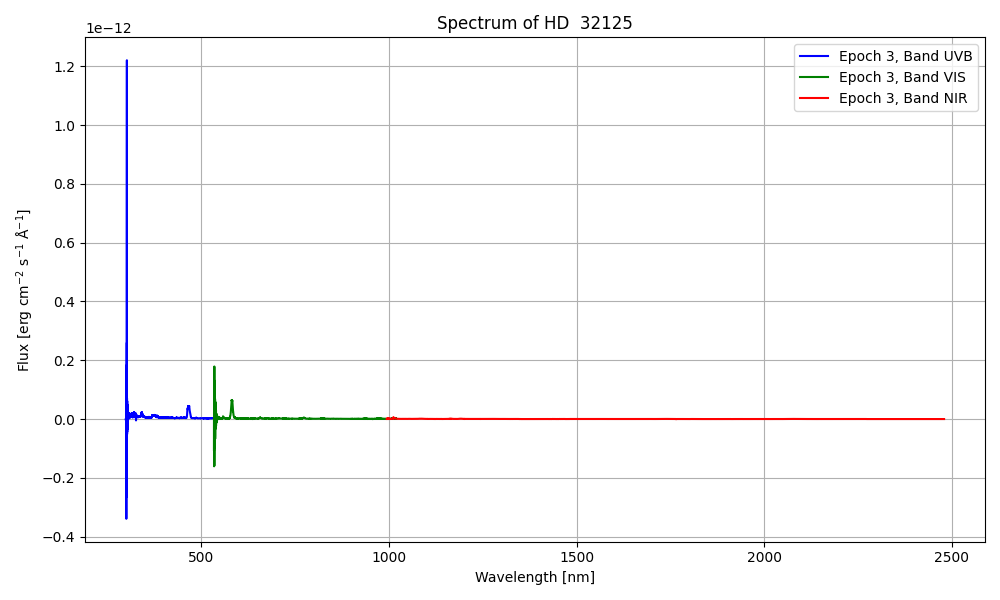

In [4]:
%matplotlib widget
star.plot_spectra([3],['UVB','VIS','NIR'],normalize=False,Rest_frame=False)

## Plotting normalizied spectra

In [5]:
import matplotlib
matplotlib.get_backend()


'widget'

Brey  95a


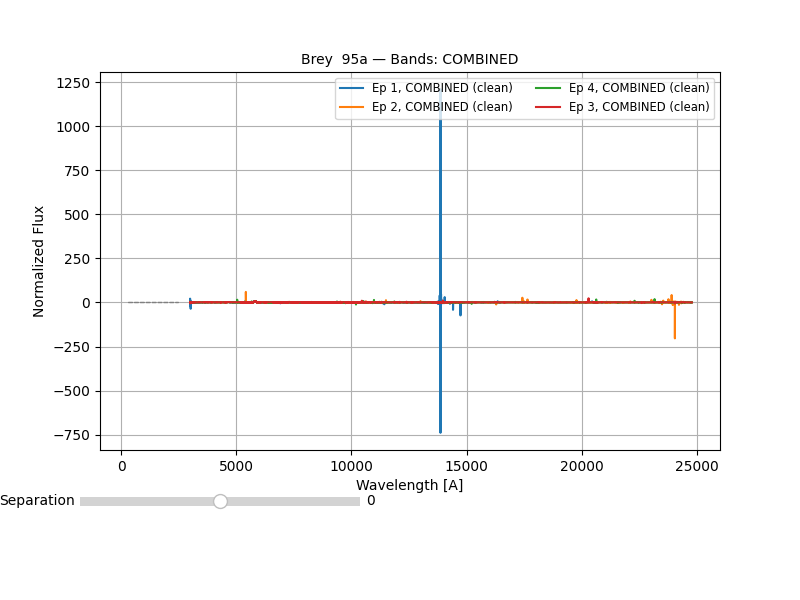

In [25]:
%matplotlib widget
star_name = specs.star_names[4]
print(star_name)
star = obs.load_star_instance(star_name)
epoch_nums = [1,2,4,3]
# epoch_nums = None
star.plot_normalized_spectra(bands = 'COMBINED',compare=False,separation=0,bin_window=0,bary_correction=False,epoch_nums=epoch_nums)
# star.plot_normalized_spectrum(3,['UVB','VIS','NIR'])

Brey  83


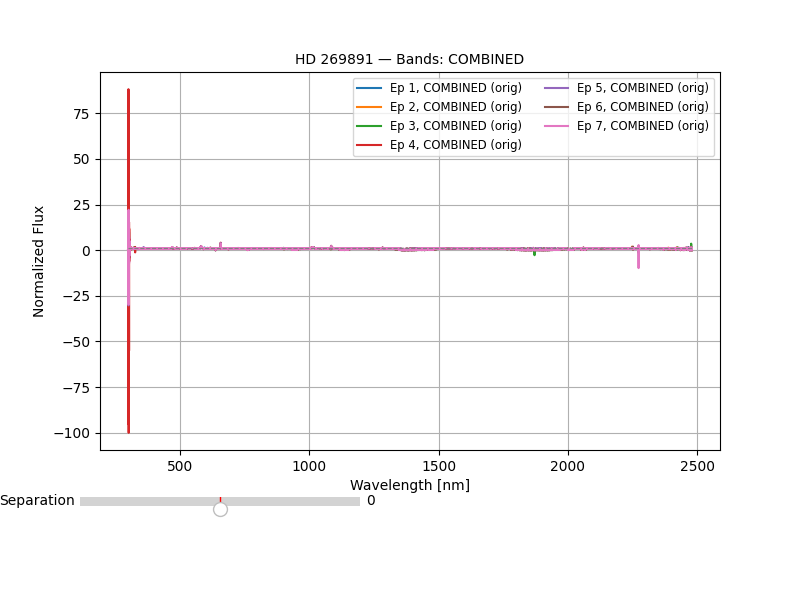

In [23]:
star_name = specs.star_names[1]
print(star_name)
star = obs.load_star_instance(star_name)
flux1 = star.load_property(epoch_num=1,band='COMBINED',property_name='cleaned_normalized_flux')['normalized_flux']
flux2 = star.load_property(epoch_num=2,band='COMBINED',property_name='cleaned_normalized_flux')['normalized_flux']
wave = star.load_property(epoch_num=1,band='COMBINED',property_name='cleaned_normalized_flux')['wavelengths']


window1 = flux1[(575 < wave)& (wave <595)]
window2 = flux2[(575 < wave)& (wave <595)]

plt.scatter(window1, window2)
plt.show()

Brey  70
No file or folder named 'cleaned_normalized_flux' found in 'Data/Brey  70/epoch1/COMBINED/output'.


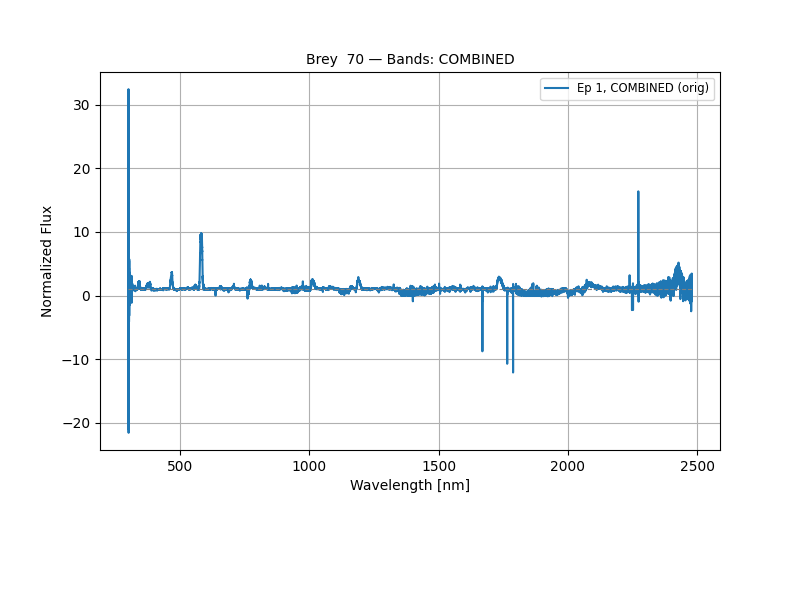

In [9]:
%matplotlib widget
star_name = specs.star_names[0]
print(star_name)
star = obs.load_star_instance(star_name)
star.plot_normalized_spectra(bands = 'COMBINED',compare=False,separation=0,bin_window=0,bary_correction=False,epoch_nums=[1])
# star.plot_normalized_spectrum(3,['UVB','VIS','NIR'])

In [24]:
emission_lines = {
    'O V 3100-3175': [310., 317.5],
    'O IV 3350-3480': [335,348],
    'C IV 3650-3900': [365.,390],
    'He II 4686':  [456., 480.],
    'C IV 5808-5812': [570., 590],
    'O VI 5210-5340': [521,534],
    'C IV 5350-5540': [535,554],
    'C III 6700-6800': [667.,684.],
    'C III 7000- 7100': [700,714],
    # 'idk1': [1715,1755],
    # 'idk2': [2050,2110],
    # 'telurics1': [1340,1495],
    # 'telurics2': [1795,1985],
    'He I 17100-17650': [1710,1765],
    'Mystery 20500-21000': [2050,2100]
}

for i, star_name in enumerate(specs.star_names):
    print(f'\'{star_name}\':')
    print('{')
    for key in emission_lines.keys():
    # print(f'{i} is {star_name}')
        print(f'"{key}": ,')
    print('}')

'Brey  70':
{
"O V 3100-3175": ,
"O IV 3350-3480": ,
"C IV 3650-3900": ,
"He II 4686": ,
"C IV 5808-5812": ,
"O VI 5210-5340": ,
"C IV 5350-5540": ,
"C III 6700-6800": ,
"C III 7000- 7100": ,
"He I 17100-17650": ,
"Mystery 20500-21000": ,
}
'Brey  83':
{
"O V 3100-3175": ,
"O IV 3350-3480": ,
"C IV 3650-3900": ,
"He II 4686": ,
"C IV 5808-5812": ,
"O VI 5210-5340": ,
"C IV 5350-5540": ,
"C III 6700-6800": ,
"C III 7000- 7100": ,
"He I 17100-17650": ,
"Mystery 20500-21000": ,
}
'HD  38029':
{
"O V 3100-3175": ,
"O IV 3350-3480": ,
"C IV 3650-3900": ,
"He II 4686": ,
"C IV 5808-5812": ,
"O VI 5210-5340": ,
"C IV 5350-5540": ,
"C III 6700-6800": ,
"C III 7000- 7100": ,
"He I 17100-17650": ,
"Mystery 20500-21000": ,
}
'HD  37248':
{
"O V 3100-3175": ,
"O IV 3350-3480": ,
"C IV 3650-3900": ,
"He II 4686": ,
"C IV 5808-5812": ,
"O VI 5210-5340": ,
"C IV 5350-5540": ,
"C III 6700-6800": ,
"C III 7000- 7100": ,
"He I 17100-17650": ,
"Mystery 20500-21000": ,
}
'Brey  95a':
{
"O V 3100-3175": ,


In [3]:
for i, star_name in enumerate(specs.star_names):
    print(f'{i} is {star_name}')

0 is Brey  70
1 is Brey  83
2 is HD  38029
3 is HD  37248
4 is Brey  95a
5 is MNM2014 LMC195-1
6 is HD  32125
7 is HD  37026
8 is HD 269818
9 is HD  38448
10 is HD  38030
11 is HD  37680
12 is Brey  58a
13 is HD  32228
14 is HD  32257
15 is HD 269888
16 is HD  36156
17 is H2013 LMCe  584
18 is RMC 140
19 is HD  32402
20 is Brey  70a
21 is Brey  16a
22 is Brey  93
23 is Brey  90a
24 is HD 269891


### Plot highest and lowest RVs fluxes

In [3]:
# Air wavelengths in Å (μm shown in labels only for readability)
# Sources noted below; optical values are the standard air rest wavelengths.
O_STAR_ABS_LINES_AIR = [
    # ── Optical (≈3800–7100 Å) ───────────────────────────────────────────
    ("Hδ 4101.74", 4101.74),
    ("He II 4200", 4199.83),
    ("Hγ 4340.47", 4340.47),
    ("He I 4387.93", 4387.93),
    ("He I 4471.48", 4471.48),
    ("He II 4541.59", 4541.59),
    ("N III 4640", 4640.64),   # blend (4634–4641)
    ("He II 4686", 4685.68),
    ("He I 4713.15", 4713.15),
    ("Hβ 4861.33", 4861.33),
    ("He I 4921.93", 4921.93),
    ("He II 5411.52", 5411.52),
    ("O III 5592", 5592.26),
    # C IV “λ5808” = 5801.33 + 5811.98 (kept as split doublet for RV work)
    ("C IV 5801.33", 5801.33),
    ("C IV 5811.98", 5811.98),
    ("He I 5875.62", 5875.62),
    ("Hα 6562.80", 6562.80),
    ("He I 6678.15", 6678.15),
    ("He I 7065.18", 7065.18),

    # ── J band (≈1.0–1.35 μm) ────────────────────────────────────────────
    ("He II 1.0124 μm", 10123.6),
    ("He I 1.0830 μm (comp.)", 10829.09),  # triplet fine-structure components
    ("He I 1.0830 μm (comp.)", 10830.25),
    ("He I 1.0830 μm (comp.)", 10830.34),
    ("Paγ 1.0938 μm", 10938.1),
    ("Paβ 1.2818 μm", 12818.1),

    # ── H band (≈1.5–1.8 μm) ─────────────────────────────────────────────
    ("Br12 1.6412 μm", 16412.0),
    ("Br11 1.6811 μm", 16811.0),
    ("He II 1.693 μm", 16930.0),
    ("He I 1.700 μm", 17002.47),  # precise NIST value

    # ── K band (≈2.0–2.4 μm) ─────────────────────────────────────────────
    ("He I 2.0581 μm", 20581.3),
    ("C IV 2.069 μm", 20690.0),
    ("C IV 2.078 μm", 20780.0),
    ("C IV 2.083 μm", 20830.0),
    ("He I 2.1127 μm", 21127.0),
    ("He I 2.1138 μm", 21138.0),
    ("Brγ 2.166 μm", 21655.0),   # air; vacuum is 21661 Å
    ("He II 2.1885 μm", 21885.0),
    # Optional Paschen-α in the gap between H/K if you cover it:
    ("Paα 1.8751 μm", 18751.0),
]

O_STAR_UVB_EXTRA_LINES = [
    # ── Balmer upper members (blueward of Hγ) ─────────────────────
    ("Hκ 3750.15", 3750.15),
    ("Hι 3770.63", 3770.63),
    ("Hθ 3797.90", 3797.90),
    ("Hη 3835.38", 3835.38),
    ("Hζ 3889.05", 3889.05),     # blends with He I 3889
    ("Hε 3970.07", 3970.07),     # blends with Ca II H 3968.47

    # ── He I (UVB-rich multiplets) ─────────────────────────────────
    ("He I 3819.61", 3819.61),
    ("He I 3889.75", 3889.75),   # (triplet) near Hζ
    ("He I 3926.54", 3926.54),
    ("He I 3964.73", 3964.73),
    ("He I 4009.26", 4009.26),
    ("He I 4026.19", 4026.19),
    ("He I 4120.82", 4120.82),
    ("He I 4143.76", 4143.76),
    ("He I 4168.97", 4168.97),
    ("He I 4387.93", 4387.93),
    ("He I 4437.55", 4437.55),
    ("He I 4471.48", 4471.48),
    ("He I 4713.15", 4713.15),
    ("He I 4921.93", 4921.93),
    ("He I 5015.68", 5015.68),
    ("He I 5047.74", 5047.74),

    # ── He II (blue/UVB + one Pickering near Hβ) ──────────────────
    ("He II 4200.47", 4200.47),
    ("He II 4541.59", 4541.59),
    ("He II 4685.68", 4685.68),
    ("He II 4859.32 (Pick.)", 4859.32),  # blends with Hβ 4861.33

    # ── Silicon ────────────────────────────────────────────────────
    ("Si IV 4088.86", 4088.86),
    ("Si IV 4116.10", 4116.10),
    ("Si II 3856.02", 3856.02),
    ("Si II 3862.60", 3862.60),
    ("Si II 4128.05", 4128.05),
    ("Si II 4130.89", 4130.89),
    ("Si III 4552.62", 4552.62),
    ("Si III 4567.84", 4567.84),
    ("Si III 4574.76", 4574.76),
    ("Si III 4813.33", 4813.33),
    ("Si III 4819.72", 4819.72),
    ("Si III 4829.07", 4829.07),

    # ── Oxygen (O II forest) ───────────────────────────────────────
    ("O II 4072.16", 4072.16),
    ("O II 4075.86", 4075.86),
    ("O II 4317.14", 4317.14),
    ("O II 4319.63", 4319.63),
    ("O II 4349.43", 4349.43),
    ("O II 4351.26", 4351.26),
    ("O II 4366.89", 4366.89),
    ("O II 4414.90", 4414.90),
    ("O II 4416.98", 4416.98),
    ("O II 4661.63", 4661.63),
    ("O II 4676.24", 4676.24),

    # ── Nitrogen ───────────────────────────────────────────────────
    ("N II 3995.00", 3995.00),
    ("N II 4041.31", 4041.31),
    ("N II 4043.53", 4043.53),
    ("N III 4097.33", 4097.33),
    ("N III 4510.89", 4510.89),
    ("N III 4514.85", 4514.85),
    ("N III 4518.15", 4518.15),
    ("N II 4601.48", 4601.48),
    ("N II 4607.16", 4607.16),
    ("N II 4613.87", 4613.87),
    ("N II 4621.39", 4621.39),
    ("N II 4630.54", 4630.54),
    ("N II 4643.08", 4643.08),

    # ── Carbon ─────────────────────────────────────────────────────
    ("C II 3918.97", 3918.97),
    ("C II 3920.69", 3920.69),
    ("C II 4267.00", 4267.00),
    ("C III 4070.26", 4070.26),
    ("C III 4152.52", 4152.52),
    ("C III 4162.88", 4162.88),
    ("C III 4186.90", 4186.90),
    ("C III 4516.77", 4516.77),
    ("C III 4647.42", 4647.42),
    ("C III 4650.25", 4650.25),
    ("C III 4651.47", 4651.47),

    # ── Magnesium (late-O / early-B discriminator) ─────────────────
    ("Mg II 4481.13", 4481.13),

    # ── Optional ISM anchors in the blue end ───────────────────────
    ("Ca II K 3933.66", 3933.66),
    ("Ca II H 3968.47", 3968.47),
]

TARGET_UVB_LINES = [
    # 3890 region: Balmer Hζ + He I blend
    ("H I Hζ 3889.05", 3889.05),
    ("He I 3889.75",   3889.75),

    # 4026 He I
    ("He I 4026.19",   4026.19),

    # 4100 region: Hδ (and a nearby helper if you want it)
    ("H I Hδ 4101.74", 4101.74),
    ("N III 4097.33",  4097.33),   # optional context line

    # 4200 He II
    ("He II 4200.47",  4200.47),

    # 4341 region: Hγ (air + vacuum alias if you like to see both)
    ("H I Hγ 4340.47", 4340.47),
    ("H I Hγ (vac) 4341.68", 4341.68),  # optional alias label
]


species_filter=("H I","He I","He II","O II","O III","C II","C III","C IV",
                    "N II","N III","Si II","Si III","Si IV","Mg II","Ca II")

HD 269891


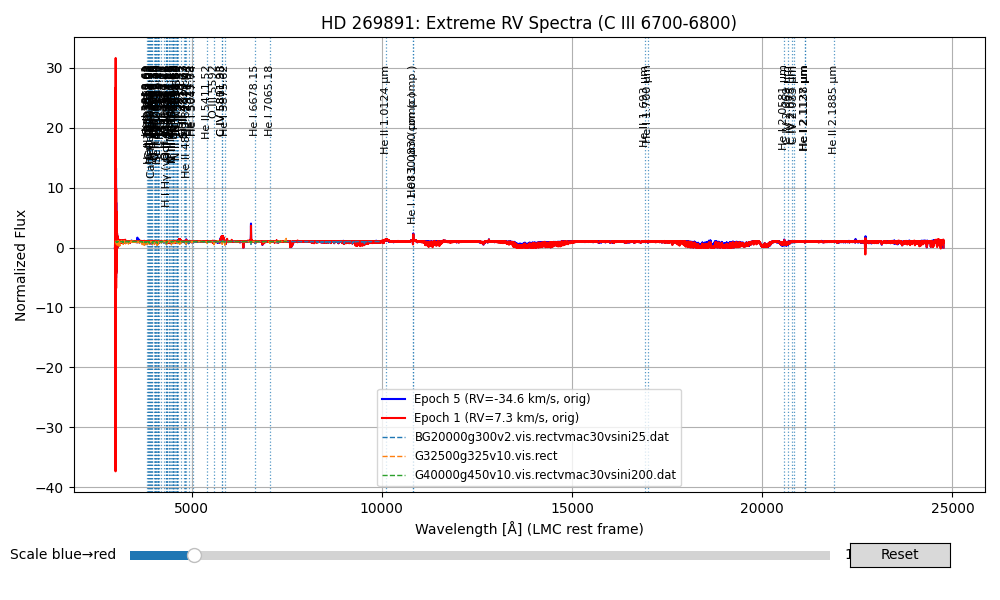

In [4]:
%matplotlib widget
models = [
    'BG20000g300v2.vis.rectvmac30vsini25.dat',
    # 'G32500g325v10.uv.rectvmac20vsini100.dat',
    'G32500g325v10.vis.rect',
    'G40000g450v10.vis.rectvmac30vsini200.dat']
O_STAR_ABS_LINES_AIR_EXT = (O_STAR_ABS_LINES_AIR + O_STAR_UVB_EXTRA_LINES + TARGET_UVB_LINES)
star_name = specs.star_names[24]
print(star_name)
star = obs.load_star_instance(star_name)
emission_line = 'C III 6700-6800'
# emission_line = 'C IV 5808-5812'
# emission_line = 'He II 4686'
star.plot_extreme_rv_spectra(emission_line = emission_line,to_plot=True,models = models,correct_lmc=True,species_filter=species_filter, auto_annotate=True,even_emission_line=False,line_list = O_STAR_ABS_LINES_AIR_EXT)

HD 269891
Loaded property from: Data/HD 269891/epoch1/COMBINED/output/RVs.npz
Loaded property from: Data/HD 269891/epoch2/COMBINED/output/RVs.npz
Loaded property from: Data/HD 269891/epoch3/COMBINED/output/RVs.npz
Loaded property from: Data/HD 269891/epoch4/COMBINED/output/RVs.npz
Loaded property from: Data/HD 269891/epoch5/COMBINED/output/RVs.npz
Loaded property from: Data/HD 269891/epoch6/COMBINED/output/RVs.npz
Loaded property from: Data/HD 269891/epoch7/COMBINED/output/RVs.npz
Property 'cleaned_normalized_flux' not found
Loaded property from: Data/HD 269891/epoch5/COMBINED/output/normalized_flux.npz
Property 'cleaned_normalized_flux' not found
Loaded property from: Data/HD 269891/epoch3/COMBINED/output/normalized_flux.npz


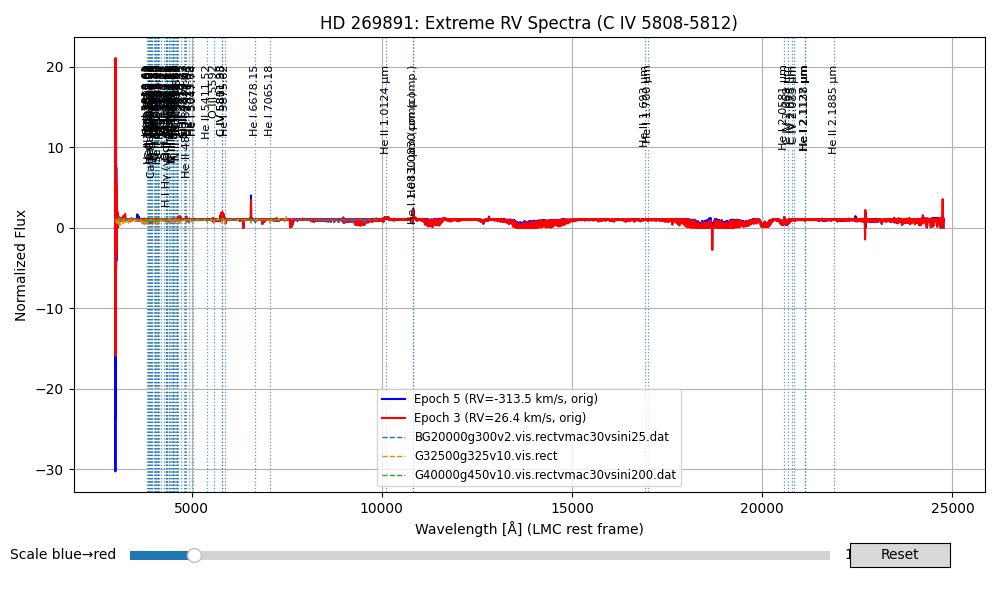

In [11]:
%matplotlib widget
models = [
    'BG20000g300v2.vis.rectvmac30vsini25.dat',
    # 'G32500g325v10.uv.rectvmac20vsini100.dat',
    'G32500g325v10.vis.rect',
    'G40000g450v10.vis.rectvmac30vsini200.dat']
O_STAR_ABS_LINES_AIR_EXT = (O_STAR_ABS_LINES_AIR + O_STAR_UVB_EXTRA_LINES + TARGET_UVB_LINES)
star_name = specs.star_names[24]
print(star_name)
star = obs.load_star_instance(star_name)
emission_line = 'C III 6700-6800'
emission_line = 'C IV 5808-5812'
# emission_line = 'He II 4686'
star.plot_extreme_rv_spectra(emission_line = emission_line,to_plot=True,models = models,correct_lmc=True,species_filter=species_filter, auto_annotate=True,even_emission_line=False,line_list = O_STAR_ABS_LINES_AIR_EXT)

### Plotting backuped up spectra vs new spectra

HD  38029
Loaded property from: Data/HD  38029/epoch1/COMBINED/output/cleaned_normalized_flux.npz
Loaded property from: Data/HD  38029/epoch1/COMBINED/output/cleaned_normalized_flux.npz
/Users/guyshtainer/Library/CloudStorage/OneDrive-Tel-AvivUniversity/תואר שני!/Thesis/Codes

Found backup files in 'overwritten' folder:
1. cleaned_normalized_flux_backup_05_08_2025__19_05_48.npz
2. cleaned_normalized_flux_backup_19_05_2025__18_07_04.npz
3. cleaned_normalized_flux_backup_19_05_2025__18_12_07.npz
4. cleaned_normalized_flux_backup_19_08_2025__18_20_29.npz
5. cleaned_normalized_flux_backup_21_08_2025__16_09_43.npz
6. cleaned_normalized_flux_backup_21_08_2025__16_12_47.npz
7. cleaned_normalized_flux_backup_31_05_2025__18_57_00.npz

Enter the number of the backup file to load (or 0 to cancel)


 5


Loaded backup file: cleaned_normalized_flux_backup_21_08_2025__16_09_43.npz


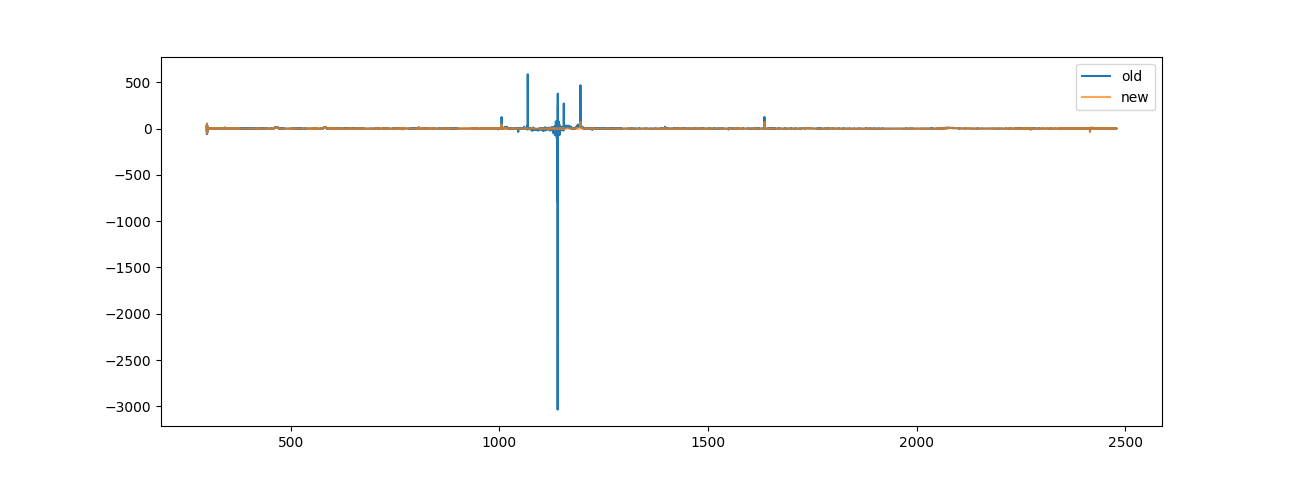

In [9]:
%matplotlib widget
plt.clf()
star_name = specs.star_names[2]
print(star_name)
star = obs.load_star_instance(star_name)
spectra = star.load_property(epoch_num=1,band='COMBINED',property_name='cleaned_normalized_flux')
new_flux = (spectra['normalized_flux']-1)*16/7 +1
new_wave = star.load_property(epoch_num=1,band='COMBINED',property_name='cleaned_normalized_flux')['wavelengths']
old_spectra = star.load_property(epoch_num=1,band='COMBINED',property_name='cleaned_normalized_flux',from_backup=True)
old_flux = old_spectra['normalized_flux']
old_wave = old_spectra['wavelengths']
plt.plot(old_wave,old_flux,label='old')
plt.plot(new_wave,new_flux,label='new',alpha=0.7)
plt.legend()
plt.show()

### Preview SNR snitch for cleaned normalized flux

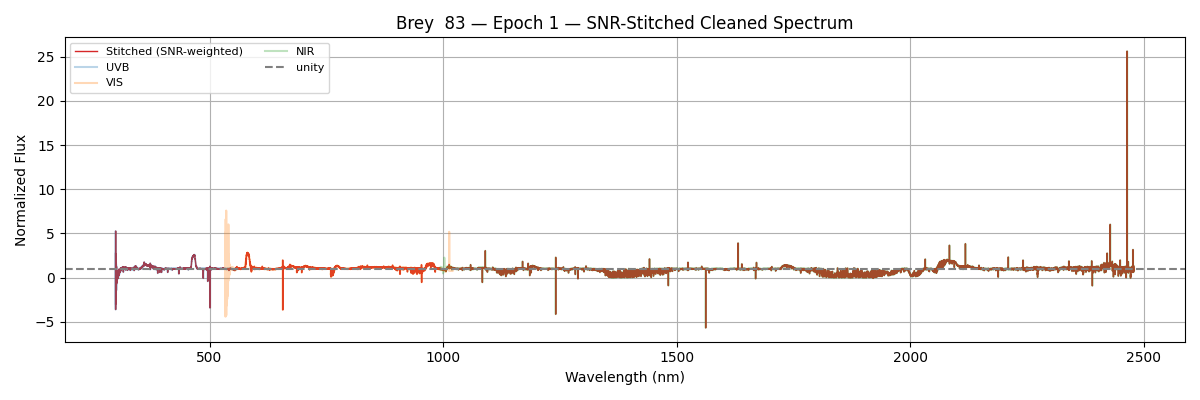

In [8]:
%matplotlib widget
star.preview_snr_stitch_cleaned_normalized(1)
# data = star.load_property('cleaned_normalized_flux',4,'NIR')
# flux = data['normalized_flux']
# wave = data['wavelengths']
# print(len(flux))
# print(len(wave))

## Plotting NRES spectra

### plotting normalized spectra

BAT99 not found properly. Indices -1, 39. Found sion="1.0" encoding="UTF-8" ?>


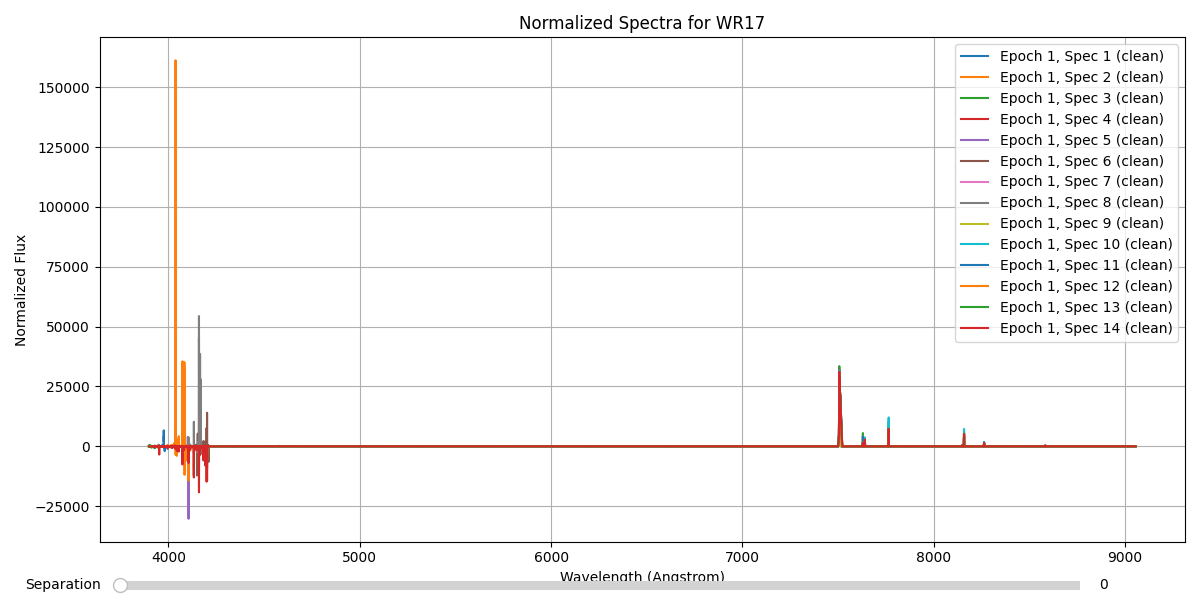

In [14]:
%matplotlib widget
star_names = ['WR 52','WR17']
star_name = star_names[1]
star = obs.load_star_instance(star_name)
spectra_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
# spectra_list = [1,2,3]
star.plot_normalized_spectra(1,spectra_list,bin_window=20,clean=True,initial_separation=0)
# star_name = star_names[0]
# star = obs.load_star_instance(star_name)
# star.plot_normalized_spectra([1,2,3],[1,3])
# star.plot_normalized_spectra2(1,1)

### Plotting raw spectra

Data loaded from Data/WR 52/epoch1/1/1D/cptnrs03-fa13-20250103-0050-e92-1d.fits.fz


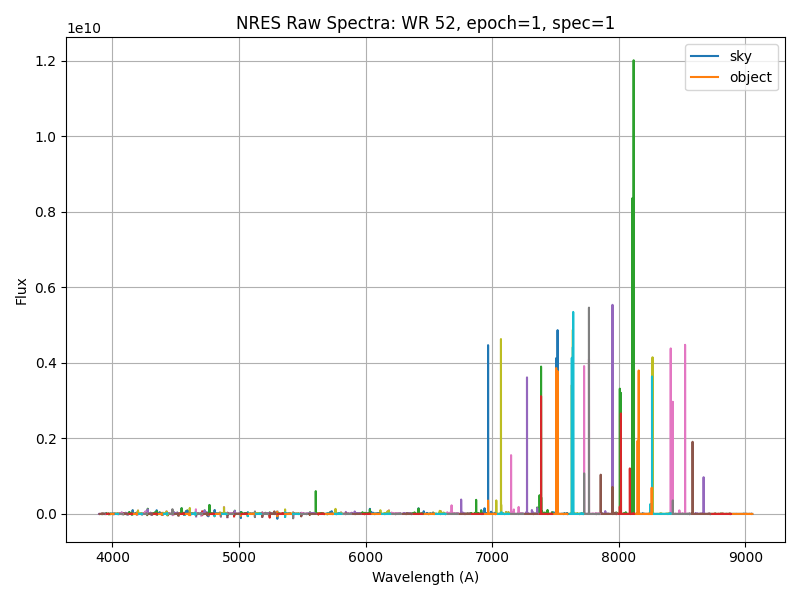

In [4]:
%matplotlib widget
star = obs.load_star_instance('WR17')
plt.clf()
normalized_data = star.load_property('nornormalized_data')
wave = normalized_data

### plotting SNR

{'wavelength': array([3897.88485403, 3897.9067727 , 3897.9286876 , ..., 9054.98743181,
       9055.01691123, 9055.04638386]), 'flux': array([-1.16903305e+05, -6.15583200e+04,  1.22863903e+05, ...,
        3.48336815e+05, -4.04723991e+05, -4.84475906e+01]), 'SNR': array([0.70149219, 0.59653747, 0.53779571, ..., 0.61453935, 0.54707681,
       0.52778694])}


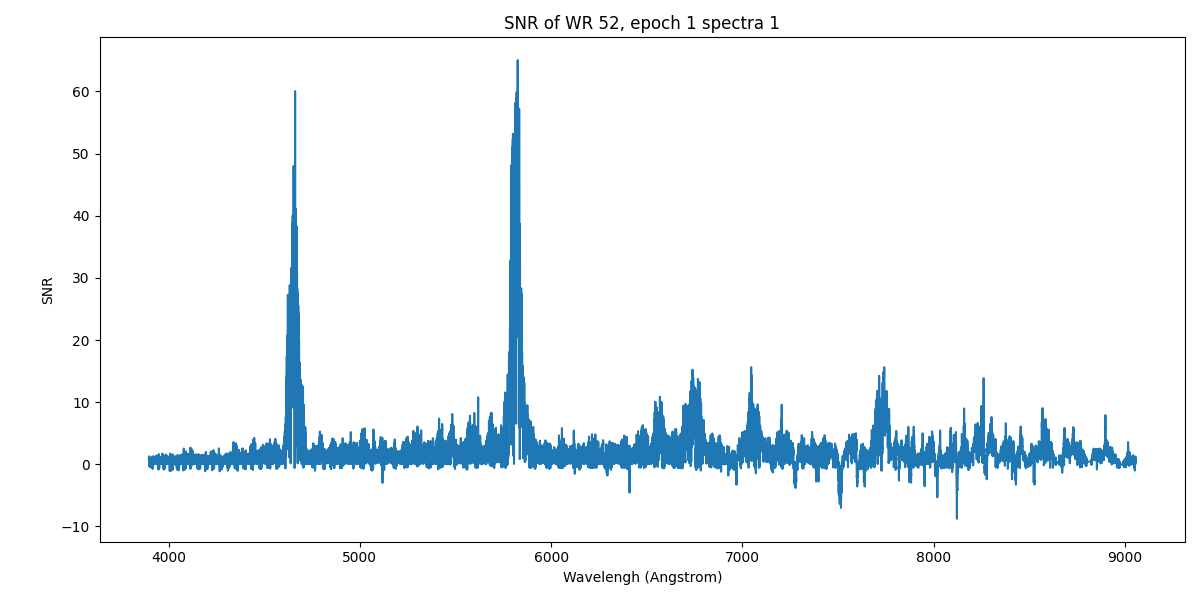

In [17]:
%matplotlib widget

# star.list_available_properties()
star = obs.load_star_instance(star_names[0])
combined_flux = star.load_property('combined_flux',1,1)
wave = combined_flux['wavelength']
flux = combined_flux['flux']
print(combined_flux)
SNR = combined_flux['SNR']
plt.clf()
plt.plot(wave,SNR)
plt.title(f'SNR of {star_names[0]}, epoch 1 spectra 1')
plt.xlabel('Wavelengh (Angstrom)')
plt.ylabel(f'SNR')
plt.show()

Data loaded from Data/WR17/epoch1/12/1D/cptnrs03-fa13-20250103-0044-e92-1d.fits.fz


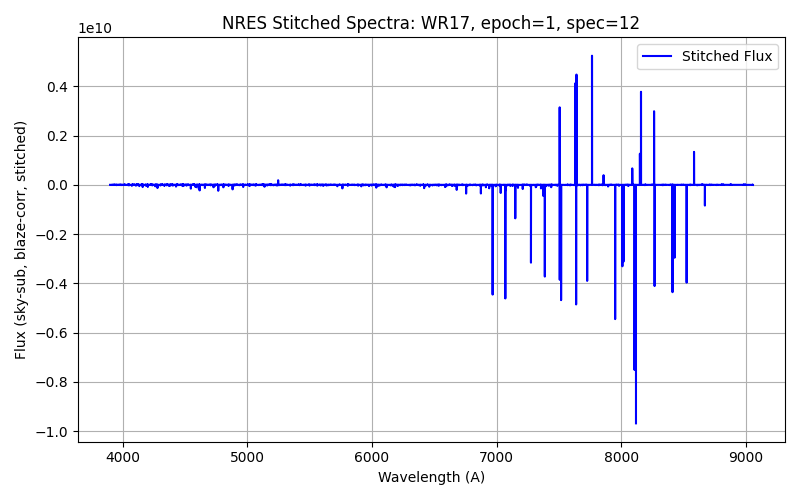

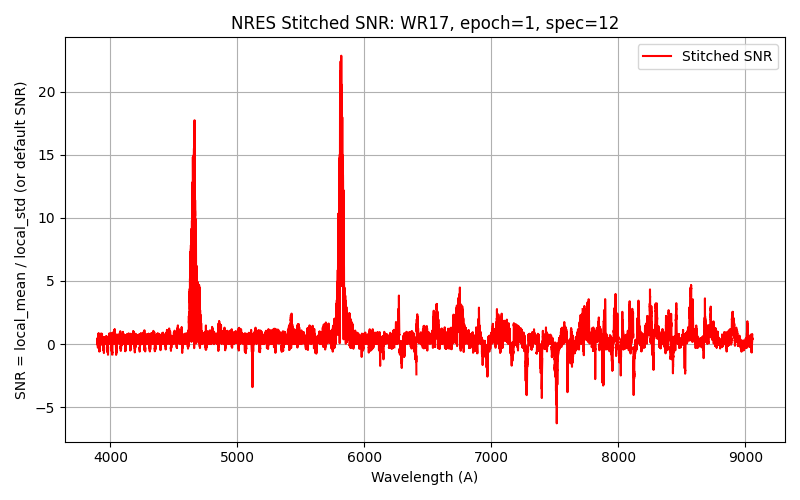

In [14]:
%matplotlib widget
wave,flux,snr = star.plot_stitched_spectra(1,12,my_SNR = True,plot_SNR=True,window_size = 20)

Data loaded from Data/WR17/epoch1/12/1D/cptnrs03-fa13-20250103-0044-e92-1d.fits.fz
[0. 0. 0. 0. 0. 0. 0. 0. 0.]


/var/folders/hm/f5s7jhns5qvgrw2hxpgfn5w80000gn/T/ipykernel_6267/2644009448.py:9: RuntimeWarning: invalid value encountered in divide
  plt.plot(wave[start + 1],flux[start + 1]/blaze[start + 1])
/var/folders/hm/f5s7jhns5qvgrw2hxpgfn5w80000gn/T/ipykernel_6267/2644009448.py:10: RuntimeWarning: invalid value encountered in divide
  plt.plot(wave[start + 3],flux[start + 3]/blaze[start + 3])
/var/folders/hm/f5s7jhns5qvgrw2hxpgfn5w80000gn/T/ipykernel_6267/2644009448.py:11: RuntimeWarning: invalid value encountered in divide
  plt.plot(wave[start + 5],flux[start + 5]/blaze[start + 5])
/var/folders/hm/f5s7jhns5qvgrw2hxpgfn5w80000gn/T/ipykernel_6267/2644009448.py:12: RuntimeWarning: invalid value encountered in divide
  plt.plot(wave[start + 7],flux[start + 7]/blaze[start + 7])


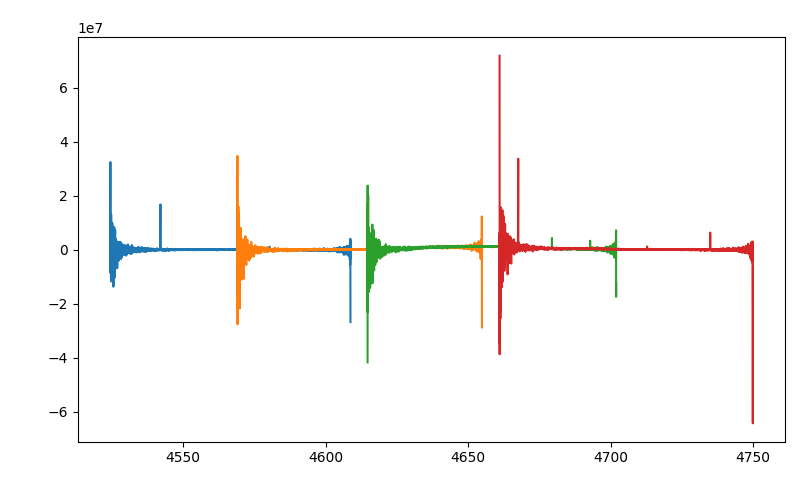

In [5]:
%matplotlib widget
data = star.load_observation(1,12).data
flux = np.flip(data['flux'])
blaze = np.flip(data['blaze'])
wave = np.flip(data['wavelength'])
print(wave[1][10:19])
start = 33
plt.clf()
plt.plot(wave[start + 1],flux[start + 1]/blaze[start + 1])
plt.plot(wave[start + 3],flux[start + 3]/blaze[start + 3])
plt.plot(wave[start + 5],flux[start + 5]/blaze[start + 5])
plt.plot(wave[start + 7],flux[start + 7]/blaze[start + 7])
# plt.plot(wave[1],flux[1])
# plt.plot(wave[3],flux[3])
plt.show()

Data loaded from Data/WR17/epoch1/12/1D/cptnrs03-fa13-20250103-0044-e92-1d.fits.fz


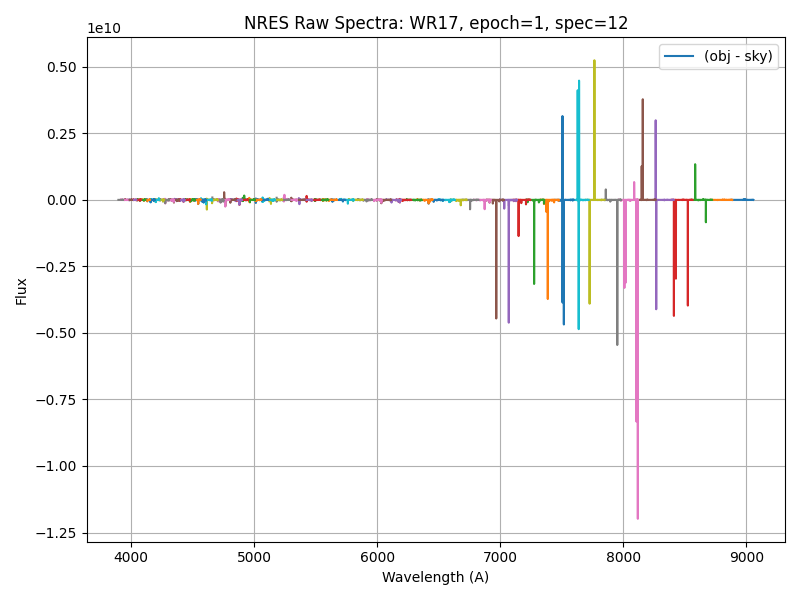

In [17]:
%matplotlib widget
blaze_correction = True
star.plot_raw_spectra(1,12,blaze_correction=blaze_correction,subtract_sky=True,just_sky = False,just_target=True)
emissions = [(4550,4800),(5700,5900)]
plt.xlim(emissions[1])
if blaze_correction:
    plt.ylim((-1e7,0.5e7))
else:
    plt.ylim((-100,1000))

In [4]:
obs = obsm()
star_name = specs.star_names[0]
star = obs.load_star_instance(star_name)
norm = star.load_property('normalized_flux',1,'COMBINED')
print(norm)
points = star.load_property('norm_anchor_wavelengths',1,'COMBINED')
print(points)

{'wavelengths': array([ 298.92,  298.94,  298.96, ..., 2478.84, 2478.9 , 2478.96],
      dtype='>f8'), 'normalized_flux': array([ 0.09609028, -0.05070256,  0.01819126, ...,  0.51625229,
        0.27221397,  0.        ])}
[ 309.52  317.76  332.42  350.58  364.2   387.58  398.84  404.9   412.8
  429.6   475.92  494.38  507.92  520.18  535.68  552.4   568.92  607.92
  631.68  667.96  695.46  714.22  750.68  809.56  849.8   860.22  876.46
  903.5   921.12  992.72 1044.06 1067.82 1103.7  1176.9  1222.8  1331.76
 1521.06 1651.62 1759.2  1985.46 2135.88 2259.66 2396.58 2468.88]


# Plotting the normalized flux when trying to take the 2D image and throw the top and bottom panes, sun along the vertical axis and normalized using what I chose for the 1D flux. And comparing to my normalization

In [2]:
obs = obsm()
star_name = specs.star_names[12]
print(star_name)
star = obs.load_star_instance(star_name)
epoch_num = 4

Brey  58a


In [6]:
data = []
for star_name in specs.star_names:
    star = obs.load_star_instance(star_name)
    data.append([star_name])

df = pd.DataFrame(data, columns=["Star Name"])
print(df)

           Star Name
0           Brey  70
1           Brey  83
2          HD  38029
3          HD  37248
4          Brey  95a
5   MNM2014 LMC195-1
6          HD  32125
7          HD  37026
8          HD 269818
9          HD  38448
10         HD  38030
11         HD  37680
12         Brey  58a
13         HD  32228
14         HD  32257
15         HD 269888
16         HD  36156
17   H2013 LMCe  584
18           RMC 140
19         HD  32402
20         Brey  70a
21         Brey  16a
22          Brey  93
23         Brey  90a
24         HD 269891


In [ ]:
%matplotlib widget
obs = obsm()
star_name = specs.star_names[0]
star = obs.load_star_instance(star_name)
try:
    for epoch_num in range(1,8):
        for band in ['UVB','VIS','NIR']:
            star.clean_flux_and_normalize_interactive(epoch_num,band)

In [19]:
%matplotlib widget
star.clean_flux_and_normalize(epoch_num,'VIS')

Data/Brey  58a/epoch4/VIS/2D image/ADP.2021-09-20T20:03:20.595.fits
Data loaded from Data/Brey  58a/epoch4/VIS/2D image/ADP.2021-09-20T20:03:20.595.fits
Data/Brey  58a/epoch4/VIS/ADP.2021-09-20T20_03_20.594.fits
Data loaded from Data/Brey  58a/epoch4/VIS/ADP.2021-09-20T20_03_20.594.fits
The top lines is: -30, and the bottom line is: -68
 anchor_points_in_range: [538.34 567.54 606.62 650.3  747.8  808.78 872.5  892.58 995.48]
found points from wavelngth_2D: [538.34 567.54 606.62 650.3  747.8  808.78 872.5  892.58 995.48]


ValueError: operands could not be broadcast together with shapes (38,) (24318,) 

Data/Brey  83/epoch2/NIR/2D image/ADP.2020-12-07T08:55:14.104.fits
Data loaded from Data/Brey  83/epoch2/NIR/2D image/ADP.2020-12-07T08:55:14.104.fits
Data/Brey  83/epoch2/NIR/ADP.2020-12-07T08_55_14.103.fits
Data loaded from Data/Brey  83/epoch2/NIR/ADP.2020-12-07T08_55_14.103.fits
The top lines is: -24, and the bottom line is: -52
 anchor_points_in_range: [1032.3  1042.62 1068.66 1224.36 1295.94 1534.5  1562.1  1592.1  1626.18
 1660.68 1715.34 1772.04 1987.62 2037.36 2153.76 2187.12 2208.42 2250.
 2305.86 2395.02 2477.4 ]
found points from wavelngth_2D: [1032.3  1042.62 1068.66 1224.36 1295.94 1534.5  1562.1  1592.1  1626.18
 1660.68 1715.34 1772.04 1987.62 2037.36 2153.76 2187.12 2208.42 2250.
 2305.86 2395.02 2477.4 ]


/Users/guyshtainer/Library/CloudStorage/OneDrive-mail.tau.ac.il/תואר שני!/Thesis/Thesis-codes/StarClass.py:1640: RuntimeWarning: invalid value encountered in divide
  relative_difference = flux_difference / external_normalized_flux_band


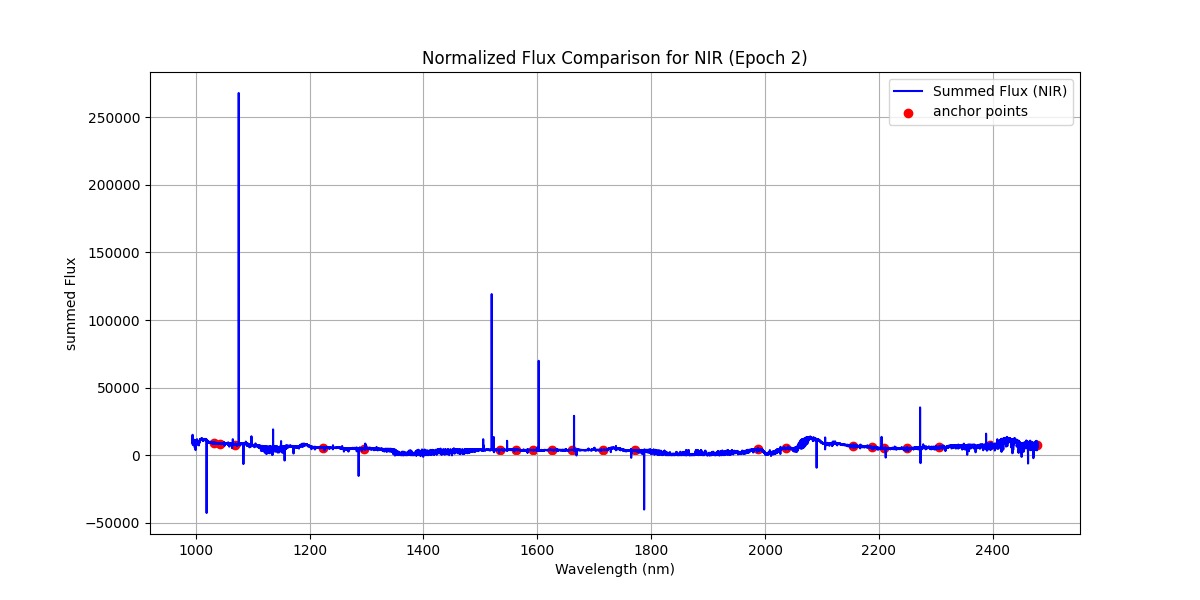

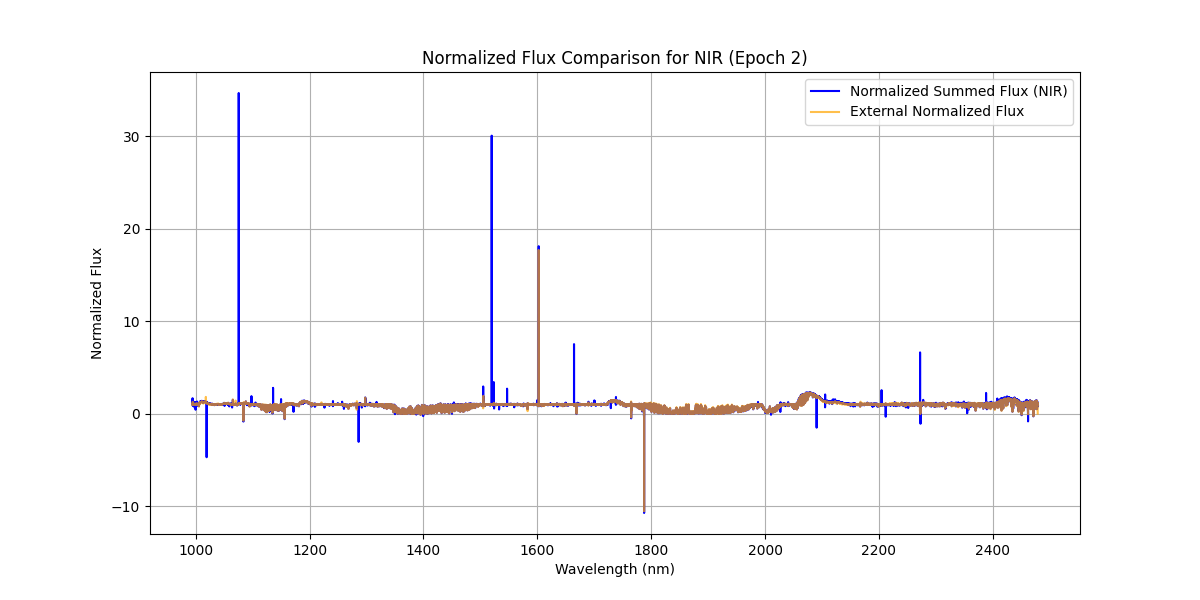

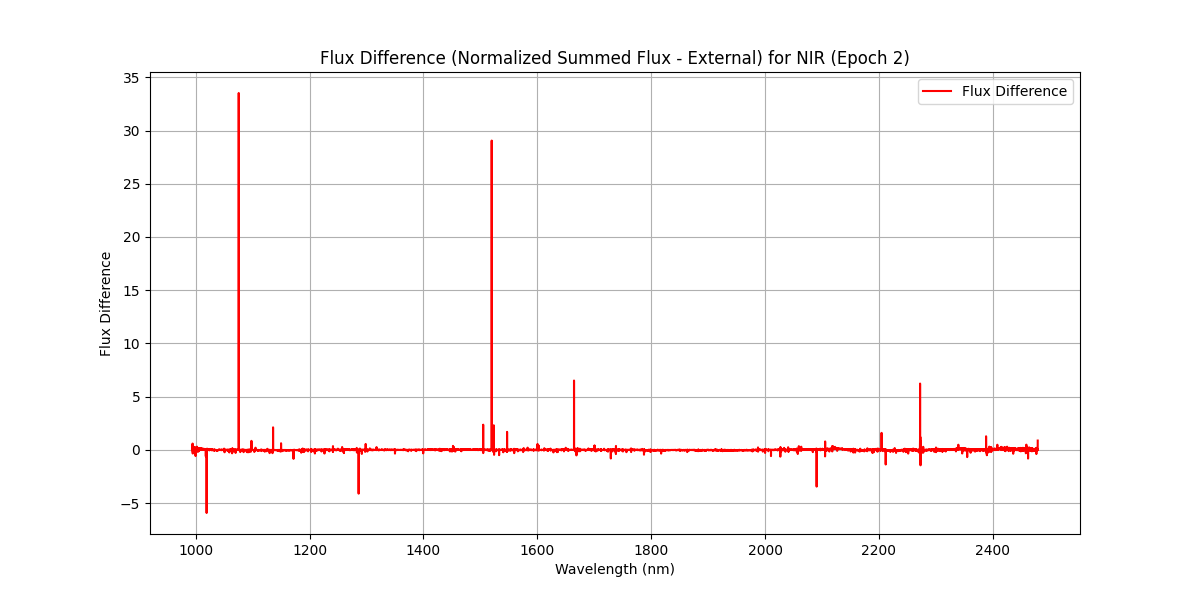

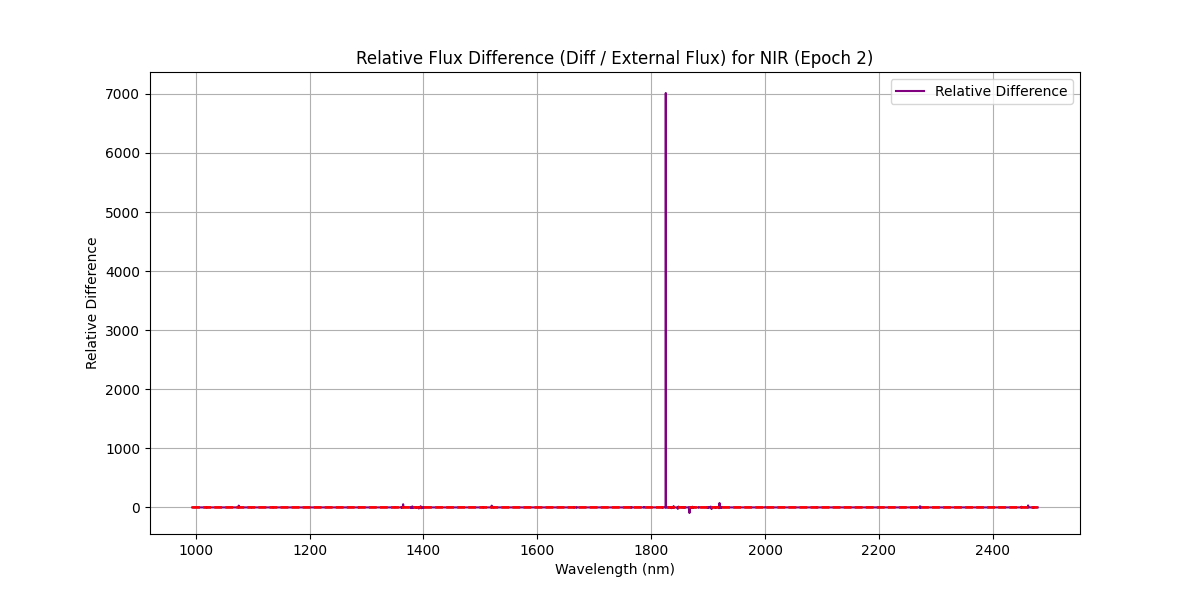

(array([1.16068533, 1.27398004, 1.38727474, ..., 0.91448187, 0.88017143,
        0.87559338]),
 array([ 994.02,  994.04,  994.06, ..., 2478.84, 2478.9 , 2478.96],
       dtype='>f8'),
 (-52, -24))

In [5]:
%matplotlib widget
star.clean_flux_and_normalize(epoch_num,'NIR')